**Preprocessing**


In [73]:
#Final comment 11/30
#Finished all visualization parts 11/30 5:41 PM

#Load CSV to Pandas DataFrame
import numpy as np
import pandas as pd

df = pd.read_csv("GermanCredit.csv")
df #DataFrame

#1 Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)
col_dict = {} #col: Numb of none
for each_column in df:
    
    column = df[each_column] #series
    lst = column.values #gives each values for each column
    counter = 0 
    for val in lst: #iterate thru each value in column
        if val == "none":
            counter += 1
    col_dict[each_column] = counter
    
print(col_dict)
n = 3
for i in range(n):
    max_key = max(col_dict, key=col_dict.get) #gets max key in dict
    del df[max_key] #delete 
    del col_dict[max_key] #delete from dictionary


{'checking_status': 0, 'duration': 0, 'credit_history': 0, 'purpose': 0, 'credit_amount': 0, 'savings_status': 0, 'employment': 0, 'installment_commitment': 0, 'personal_status': 0, 'other_parties': 907, 'residence_since': 0, 'property_magnitude': 0, 'age': 0, 'other_payment_plans': 814, 'housing': 0, 'existing_credits': 0, 'job': 0, 'num_dependents': 0, 'own_telephone': 596, 'foreign_worker': 0, 'class': 0}


In [74]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


In [75]:
#2 Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes
for each_column in df:
    if df[each_column].dtype == "object": 
        df[each_column] = df[each_column].str.strip("'")
    
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [76]:
#3 The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.
df.loc[df["checking_status"] == "no checking", "checking_status"] = "No Checking"
df.loc[df["checking_status"] == "<0", "checking_status"] = "Low"
df.loc[df["checking_status"] == "0<=X<200", "checking_status"] = "Medium"
df.loc[df["checking_status"] == ">=200", "checking_status"] = "High"

df
    


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [77]:
#4 The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').
df.loc[df["savings_status"] == "no known savings", "savings_status"] = "No Savings"
df.loc[df["savings_status"] == "<100", "savings_status"] = "Low"
df.loc[df["savings_status"] == "100<=X<500", "savings_status"] = "Medium"
df.loc[df["savings_status"] == "500<=X<1000", "savings_status"] = "High"
df.loc[df["savings_status"] == ">=1000", "savings_status"] = "High"


df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [78]:
#5 Change class column values from 'good' to '1' and 'bad' to '0'
df.loc[df["class"] == "good", "class"] = "1"
df.loc[df["class"] == "bad", "class"] = "0"
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [79]:
#6 
df.loc[df["employment"] == "unemployed", "employment"] = "Unemployed"
df.loc[df["employment"] == "<1", "employment"] = "Amateur"
df.loc[df["employment"] == "1<=X<4", "employment"] = "Professional"
df.loc[df["employment"] == "4<=X<7", "employment"] = "Experienced"
df.loc[df["employment"] == ">=7", "employment"] = "Expert"
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


**Analysis**

In [80]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [81]:
#1a Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).
pd.crosstab(df["foreign_worker"], df["class"])


class,0,1
foreign_worker,,
no,4,33
yes,296,667


In [82]:
#1b Similarly, get the count of each category of employment for each category of saving_status.
pd.crosstab(df["employment"], df["savings_status"])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [83]:
#2 Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.
df.loc[(df["personal_status"] == 'male single') & (df["employment"] == 'Experienced'), "credit_amount"].mean()

4142.592592592592

In [84]:
#3 Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding
job_types = df["job"].unique()
for each_job in job_types:
    avg_credit_duration = df.loc[df["job"] == each_job, "duration"].mean()
    print(each_job, avg_credit_duration)


skilled 21.41111111111111
unskilled resident 16.535
high qualif/self emp/mgmt 25.16891891891892
unemp/unskilled non res 17.363636363636363


In [85]:
#4 For the purpose 'education', what is the most common checking_status and savings_status?
df1 = pd.crosstab(df["purpose"], df["checking_status"])
df1

checking_status,High,Low,Medium,No Checking
purpose,,,,
business,5,15,40,37
domestic appliance,1,5,2,4
education,4,13,13,20
furniture/equipment,11,72,39,59
new car,16,78,60,80
other,0,4,7,1
radio/tv,24,54,75,127
repairs,0,5,9,8
retraining,0,2,3,4


In [86]:
df1.loc["education"]

checking_status
High            4
Low            13
Medium         13
No Checking    20
Name: education, dtype: int64

In [87]:
df2 = pd.crosstab(df["purpose"], df["savings_status"])
df2

savings_status,High,Low,Medium,No Savings
purpose,,,,
business,10,56,17,14
domestic appliance,2,6,1,3
education,4,30,5,11
furniture/equipment,23,128,9,21
new car,24,138,30,42
other,0,8,2,2
radio/tv,32,169,27,52
repairs,3,14,3,2
retraining,1,4,0,4


In [88]:
df2.loc["education"]

savings_status
High           4
Low           30
Medium         5
No Savings    11
Name: education, dtype: int64

In [89]:
print("    Most common checking status: " + str(df1.loc["education"].idxmax()))
print("    Most common savings status: " + str(df2.loc["education"].idxmax()))

    Most common checking status: No Checking
    Most common savings status: Low


**Visualizations**

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


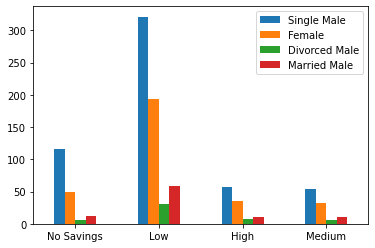

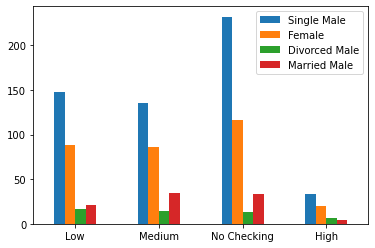

In [90]:
from matplotlib import pyplot as plt
#1 Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors
personalstatustypes = df.personal_status.unique()
msingle = []
f = []
mdiv = []
mmar = []

savingsstatustypes = df.savings_status.unique()
savingsstatustypes
for i in range(len(savingsstatustypes)):
    msingle.append(df[(df['savings_status'] == savingsstatustypes[i]) & (df['personal_status'] == 'male single')].personal_status.value_counts()[0])
    f.append(df[(df['savings_status'] == savingsstatustypes[i]) & (df['personal_status'] == 'female div/dep/mar')].personal_status.value_counts()[0])
    mdiv.append(df[(df['savings_status'] == savingsstatustypes[i]) & (df['personal_status'] == 'male div/sep')].personal_status.value_counts()[0])
    mmar.append(df[(df['savings_status'] == savingsstatustypes[i]) & (df['personal_status'] == 'male mar/wid')].personal_status.value_counts()[0])
savingsstatusdf = pd.DataFrame({'Single Male' : msingle, 'Female' : f, 'Divorced Male' : mdiv, 'Married Male' : mmar}, index=savingsstatustypes)

msingle2 = []
f2 = []
mdiv2 = []
mmar2 = []
checkingstatustypes = df.checking_status.unique()
for i in range(len(checkingstatustypes)):
    msingle2.append(df[(df['checking_status'] == checkingstatustypes[i]) & (df['personal_status'] == 'male single')].personal_status.value_counts()[0])
    f2.append(df[(df['checking_status'] == checkingstatustypes[i]) & (df['personal_status'] == 'female div/dep/mar')].personal_status.value_counts()[0])
    mdiv2.append(df[(df['checking_status'] == checkingstatustypes[i]) & (df['personal_status'] == 'male div/sep')].personal_status.value_counts()[0])
    mmar2.append(df[(df['checking_status'] == checkingstatustypes[i]) & (df['personal_status'] == 'male mar/wid')].personal_status.value_counts()[0])
checkingstatusdf = pd.DataFrame({'Single Male' : msingle2, 'Female' : f2, 'Divorced Male' : mdiv2, 'Married Male' : mmar2}, index=checkingstatustypes)
ax1 = savingsstatusdf.plot.bar(rot=0)
ax2 = checkingstatusdf.plot.bar(rot=0)

print(ax1)
print(ax2)

In [91]:
#2
dfTwo = df.loc[df["credit_amount"] > 4000]

In [92]:
property_mag = df["property_magnitude"].unique()
property_mag
corres_avg_age = []
for each_prop_mag in property_mag:
    avg_age = dfTwo.loc[(dfTwo["property_magnitude"] == each_prop_mag), "age"].mean()
    print(each_prop_mag, avg_age)
    corres_avg_age.append(avg_age)
    

real estate 35.72
life insurance 35.37931034482759
no known property 42.15714285714286
car 32.204301075268816


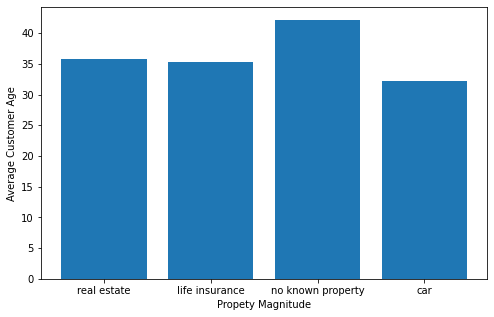

In [93]:
plt.figure(figsize=(8,5))
plt.bar(property_mag, corres_avg_age)
plt.xlabel("Propety Magnitude")
plt.ylabel("Average Customer Age")
plt.show()

In [94]:
#3
dfThree = df.loc[(df["savings_status"] == 'High') & (df["age"] > 40)]

In [95]:
personal_stat_types = dfThree["personal_status"].unique()
per_stat_count = []
for each_per_stat in personal_stat_types:
    count = len(dfThree.loc[(dfThree["personal_status"] == each_per_stat)])
    #print(count)
    per_stat_count.append(count)
    
    
    
credit_hist_types = dfThree["credit_history"].unique()
cred_hist_count = []
for each_cred_hist in credit_hist_types:
    count = len(dfThree.loc[(dfThree["credit_history"] == each_cred_hist)])
    #print(count)
    cred_hist_count.append(count)


diff_job_types = dfThree["job"].unique()
diff_job_count = []
for each_job_type in diff_job_types:
    count = len(dfThree.loc[(dfThree["job"] == each_job_type)])
    #print(count)
    diff_job_count.append(count)



array([<AxesSubplot:ylabel='0'>], dtype=object)

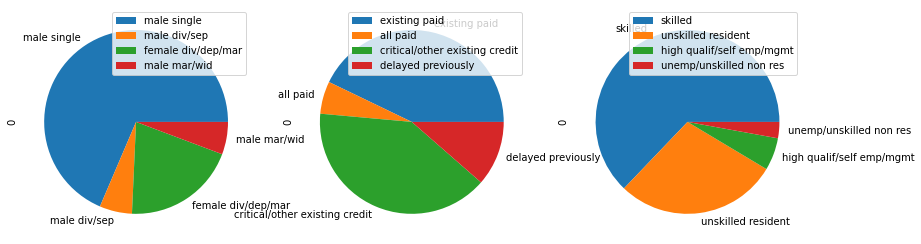

In [96]:
fig, axes = plt.subplots(1,3 ,figsize = (14, 18))

dfA = pd.DataFrame(per_stat_count ,index=personal_stat_types)
dfA.plot(kind='pie',ax = axes[0], subplots = True, figsize=(8, 8))

dfB = pd.DataFrame(cred_hist_count ,index=credit_hist_types)
dfB.plot(kind='pie',ax = axes[1], subplots = True,figsize=(8, 8))

dfC = pd.DataFrame(diff_job_count ,index=diff_job_types)
dfC.plot(kind='pie',ax = axes[2], subplots = True,figsize=(8, 8))